## Canada Housing Dataset Price Regression 
### Author: Mert Kılınçer

In [188]:
# Necessary dependent library imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [189]:
dataset = pd.read_csv("data_canada.csv",encoding='latin1') # Loading the dataset

#### Preprocess and Data Analsis

In [190]:
dataset.shape # Shape of the dataset

(35768, 10)

In [191]:
dataset.info() # Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


There are 35768 entries consisting of 10 columns in our dataset.Some of these columns our categorical and others are numerical.

In [192]:
dataset.sample(5) # Viusalization of 5 random data

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
30185,Caledon,899900.0,100 EARTH STAR TR,4,4,Ontario,76581,43.8667,-79.8667,133000.0
5148,Edmonton,450000.0,907-10238 103 Street,2,2,Alberta,1151635,53.5344,-113.4903,96000.0
32111,Burnaby,1208000.0,603-128 W 15TH STREET,2,2,British Columbia,249125,49.2667,-122.9667,83000.0
17672,Barrie,899000.0,21 DUNSMORE Lane,4,3,Ontario,154676,44.3711,-79.6769,97000.0
30522,Caledon,1298000.0,144 BACHMAN DR,4,3,Ontario,76581,43.8667,-79.8667,133000.0


In [193]:
dataset.isnull().sum() #Check For null values

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [194]:
dataset.duplicated().sum() # Check For duplicated values

2516

There is 2516 duplicated entries in our dataset so dropping them is necessary for better model performance because they can mislead our models and analysis.

In [195]:
dataset.drop_duplicates(inplace = True) # Drop duplicated rows

In [196]:
dataset.describe().T # Describe the numerical information of dataset and its transose is used for convenience 

,count,mean,std,min,25%,50%,75%,max
Price,33252.0,978096.802562,1.041994e+06,21500.0000,495000.0000,724900.0000,1.124900e+06,3.700000e+07
Number_Beds,33252.0,3.294388,1.747455e+00,0.0000,2.0000,3.0000,4.000000e+00,1.090000e+02
Number_Baths,33252.0,2.555786,1.385224e+00,0.0000,2.0000,2.0000,3.000000e+00,5.900000e+01
Population,33252.0,659254.523487,1.148804e+06,63382.0000,109167.0000,242460.0000,7.295600e+05,5.647656e+06
Latitude,33252.0,47.272550,3.307946e+00,42.2833,43.8667,48.4283,4.926670e+01,5.391690e+01
Longitude,33252.0,-98.419248,2.272848e+01,-123.9364,-122.6000,-104.6067,-7.967690e+01,6.310050e+01
Median_Family_Income,33252.0,89898.860911,1.235179e+04,62400.0000,82000.0000,89000.0000,9.700000e+04,1.330000e+05


These statistical measures are not so informative enough to derive some insight of our data but it can be good practice to record and examine it to detect some abnormalities in data collection stage.

In [197]:
def unique_value_percentages_of_total(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate the percentage of unique values relative to the sum of all observations for each column in a DataFrame.

    Args:
    - df(pd.DataFrame): The DataFrame to analyze.

    Returns:
    - pd.DataFrame: A DataFrame with columns and their corresponding percentage of unique values of total observations.
    """
    total_observations = len(df)
    percentages = []

    for column in df.columns:
        num_unique_values = df[column].nunique()
        percentage = (num_unique_values / total_observations) * 100
        
        percentages.append({'Column': column, 'Percentage_of_Total':percentage})

    percentage_df = pd.DataFrame(percentages)
    sorted_percentage_df = percentage_df.sort_values(by='Percentage_of_Total', ascending=False)

    return sorted_percentage_df

In [198]:
unique_value_percentages_of_total(dataset) # Uniqueness of columns

,Column,Percentage_of_Total
2,Address,94.367256
1,Price,13.130037
0,City,0.135330
6,Population,0.135330
7,Latitude,0.135330
8,Longitude,0.132323
9,Median_Family_Income,0.096235
3,Number_Beds,0.093227
4,Number_Baths,0.066161
5,Province,0.027066


Address column is dropped because it is very unique to use it as a predictor in our models but you can try engineer it as street type in canada after you canonize the data .When ı tried to engineer it it uniquness close to %5 of our data but it also resulted with some special location that end with 1 instance in address and grouping them is not seemed to be meaningful because their prices can be varying.In conclusion ı dropped address column.

In [199]:
dataset.drop(columns=['Address'], inplace=True) 

Note: Address is not plotted becuase it has high cardinality.

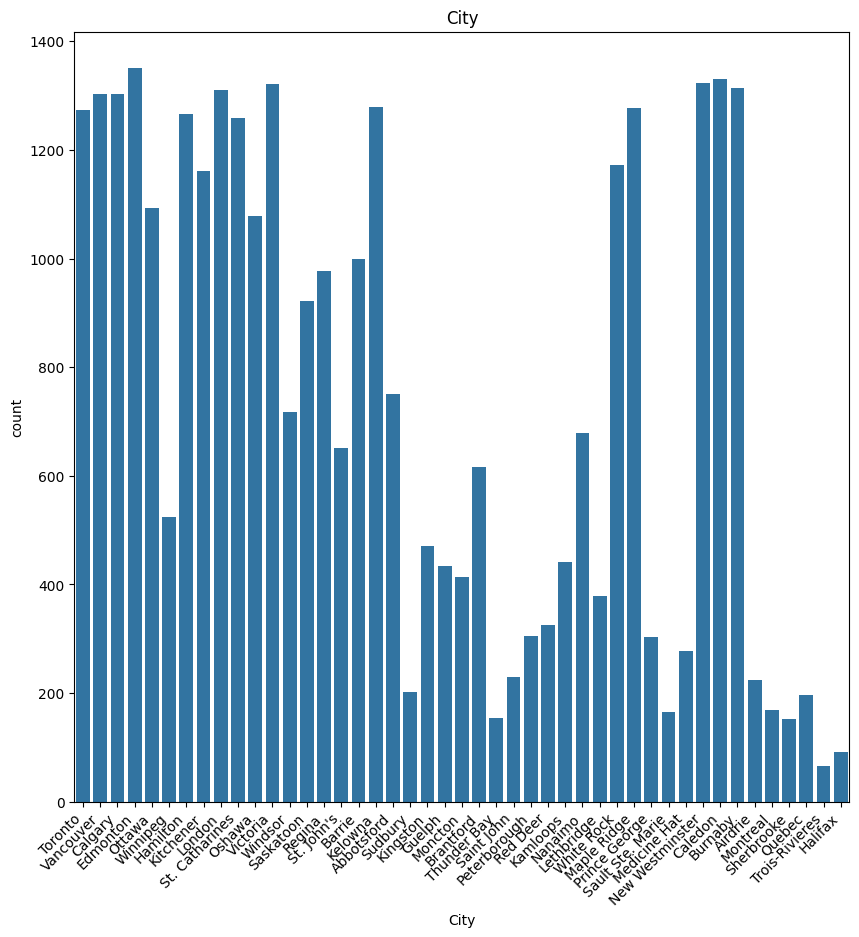

In [200]:
# Create the count plot
plt.figure(figsize=(10, 10))
sns.countplot(x='City', data=dataset)
plt.title('City')
plt.xticks(rotation=45, ha='right')
plt.show()

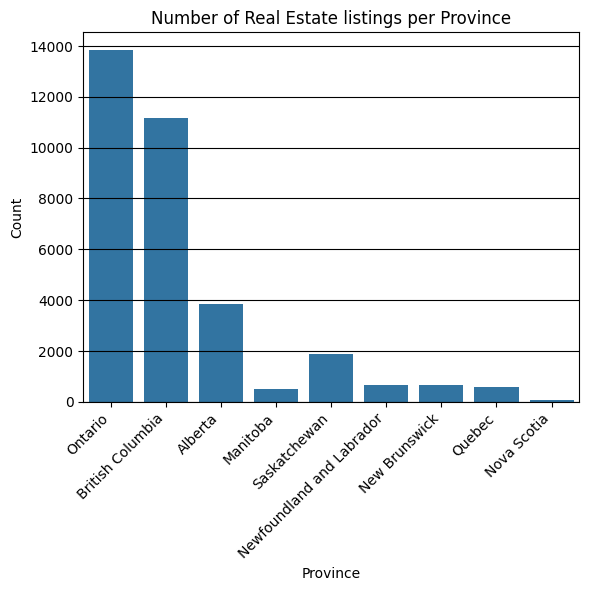

In [201]:
sns.countplot(x = 'Province', data = dataset)
plt.grid(axis = 'y',color = 'black')
plt.ylabel('Count')
plt.title("Number of Real Estate listings per Province")
plt.xticks(rotation=45, ha='right') 
plt.show()

Our data focuses on different cities in plausible in amount of data entries but in terms of Province it was Ontario and British Columbia are heavily dominant in frequency of other provinces.

In [202]:
# helper function for plotting graphs
def plot_distributions(data: pd.DataFrame,columns_to_plot=None) -> None:
    """
    Plot distributions for each column in the provided DataFrame.

    This function iterates over the specified columns (or each column if none are specified)
    in the DataFrame and plots the distribution.For numerical columns, a histogram with a 
    Kernel Density Estimate (KDE) is plotted. For categorical columns, a countplot is used.

    Parameters:
    - data (pandas.DataFrame): The DataFrame containing the data for which distributions
                               are to be plotted.
    - columns_to_plot (list, optional): A list of column names to plot. If None, all
                                        columns will be plotted.

    Returns:
    - None: This function does not return any value. It directly displays the plots.
    """
    if columns_to_plot is None:
        columns_to_plot = data.columns

    for column in columns_to_plot:
        if column in data.columns:
            plt.figure(figsize=(10,4))

        # Check if the column is numeric or categorical
            if data[column].dtype == 'object' or data[column].dtype == 'bool':
                # For categorical data, use countplot
                sns.countplot(y=column, data=data)
                plt.title(f'Distribution of {column}')
            else:
                # For numerical data, use histogram
                sns.histplot(data[column], kde=False,bins=50)
                plt.title(f'Distribution of {column}')
            
            plt.show() 
        else:
            print(f"Column '{column}' not found in DataFrame.")

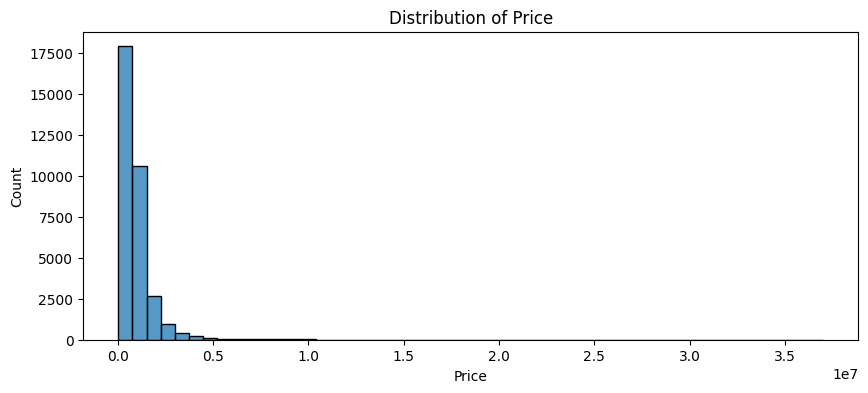

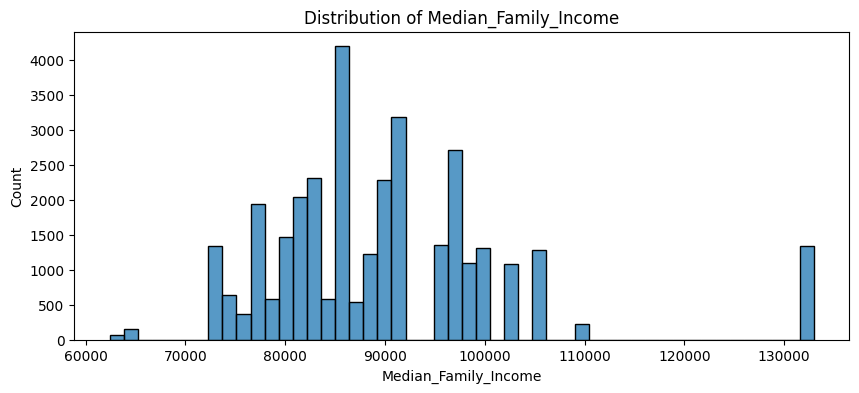

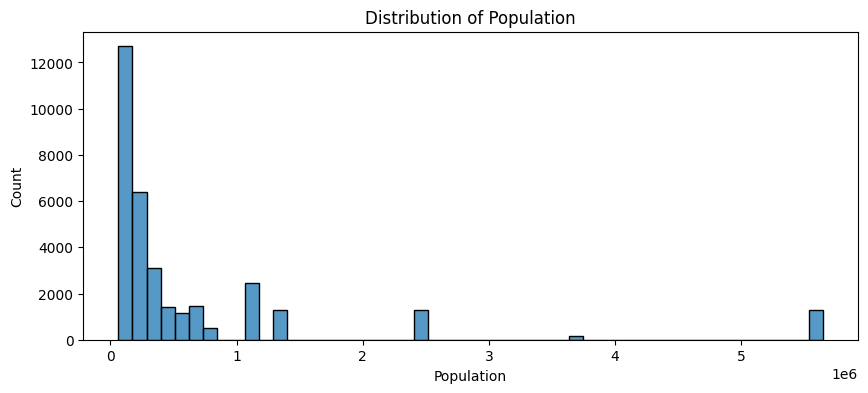

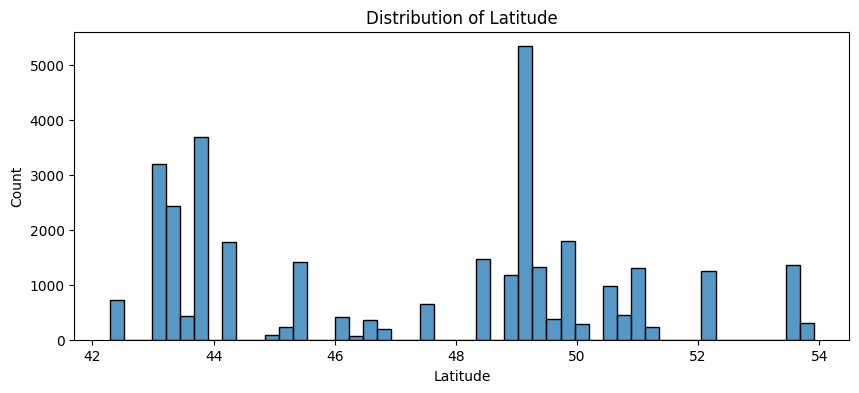

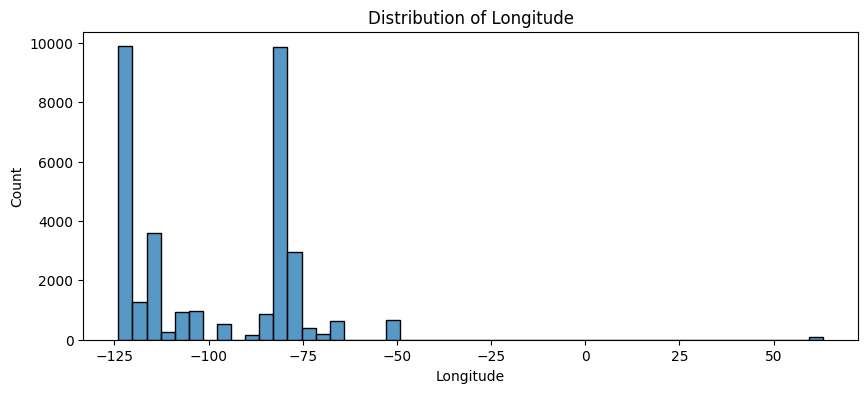

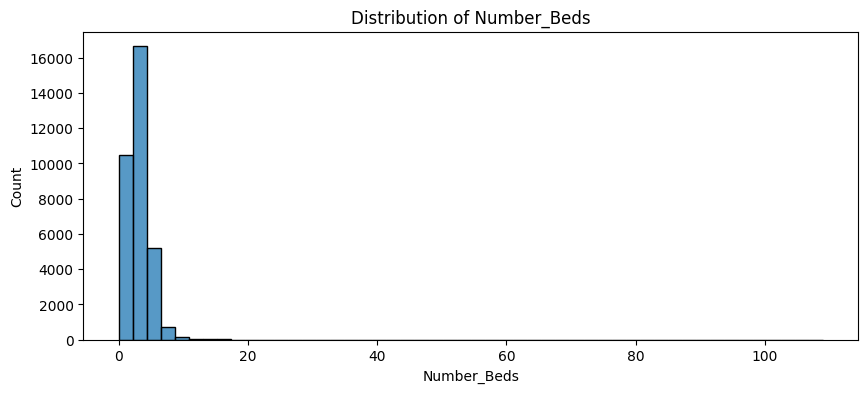

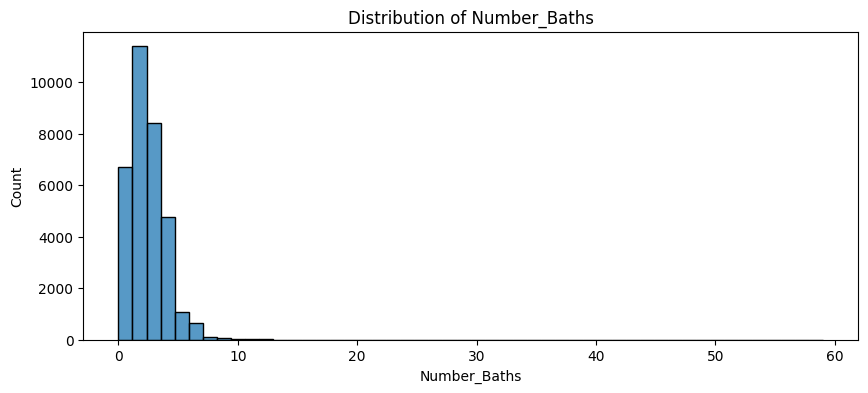

In [203]:
plot_distributions(dataset,['Price','Median_Family_Income','Population','Latitude','Longitude','Number_Beds','Number_Baths'])

Now we are looking the distributions of numerical data columns in our dataset and we can see that Price ,Number_Beds, Number_Baths , Population are positive skewed and these lead us that they are outliers on right sides that contributing to longer tails.These outliers can affect some models that use measurements like mean.

Median_Family_Income is closet distribution to normal distribution but there is gap in histogram.These can be result of an outliers presence or my binning approach that based on number of classes.Latitude is also has gaps and peaks these can be result of some groups in latitude.

Longitude is bimodal and have postive skewness that lead us that this data has outliers at longer tail and data is more frequent around 2 longitude values

In [204]:
# Group by city and check if populations are unique within each group
unique_populations = dataset.groupby('City')['Population'].nunique()

# Check if count is 1 for all values
all_unique = all(unique_populations == 1)
all_unique

True

This leads that every population is unique to its city so dropping will be better in terms of model testing and running times to reduce the size of the dataset.

In [205]:
for city in dataset['City'].unique():
    subset_df = dataset[dataset['City'] == city]
    
    # Check if there are any duplicate Latitude or Longitude values for each city
    if subset_df['Latitude'].nunique() == 1 and subset_df['Longitude'].nunique() == 1:
        pass
    else:
        print(f"Duplicate Latitude or Longitude values found for city {city}.")

Latitude and Longitude featues are also part of specific city so we will drop these features with the same reason as population.

In [206]:
dataset.drop(columns=['Population','Latitude','Longitude'], inplace=True) 

In [207]:
df=dataset.copy()

In [208]:
# List of features to analyze for outliers
features = ['Price', 'Median_Family_Income', 'Number_Beds', 'Number_Baths']

def detect_outliers(series):
    """
    Detect outliers in a numerical series using the interquartile range (IQR) method.

    Parameters:
    - series (pandas.Series): The numerical data series for which outliers are to be detected.

    Returns:
    - int: The count of outliers in the series.
    """
    # Quartiles of features
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    # Interquartile range calculation
    IQR = Q3 - Q1
    mild_outlier_threshold = 1.5 * IQR
    # Selecting outliers
    outliers = ((series < (Q1 - mild_outlier_threshold)) | (series > (Q3 + mild_outlier_threshold))).sum()
    
    return outliers

def remove_outliers(df, feature):
    """
    Remove rows with outliers for a specific feature in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - feature (str): The feature for which outliers should be removed.

    Returns:
    - pandas.DataFrame: The DataFrame with outliers removed for the specified feature.
    """
    # Quartiles of features
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    # IQR calculation
    iqr = q3 - q1
    # Upper and lower bounds for values in the data set that are acceptable
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    # Drop rows with outliers
    df = df.loc[(df[feature] >= lower_fence) & (df[feature] <= upper_fence)]

    return df

# Store the counts of outliers in a new DataFrame
outlier_counts = pd.DataFrame(columns=['Outliers'])

for column in features:
    # Traverse within numerical features to find the exact count of outliers for each feature.
    outliers = detect_outliers(df[column])
    # Adding them to the DataFrame
    outlier_counts.loc[column] = [outliers]

# Display the outlier counts DataFrame
display(outlier_counts)

# Remove outliers for each feature
for feature in features:
    df = remove_outliers(df, feature)



,Outliers
Price,2416
Median_Family_Income,1331
Number_Beds,424
Number_Baths,2485


Above code is used for outlier handling with iqr(Inter quartile range) method to detect outliers and dropped the entries that contains them.This process is advantageous in some machine learning models that affected from outlier presence like KNN.Also outliers affect some other models because it distorts soem measures that use in regression tasks.

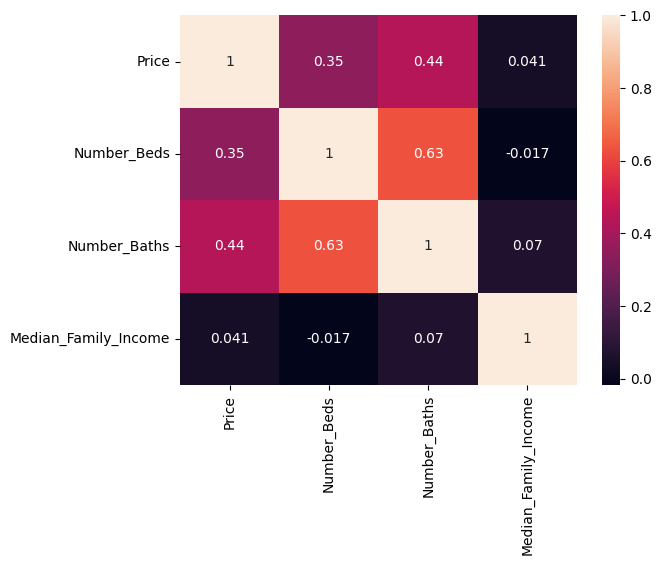

In [209]:
correleation_matrix =df.corr()
sns.heatmap(correleation_matrix,annot=True)
plt.show()

Correlation between features are essential to understand liner relationships between features this can be used in featue selection and removing redundant features with highly correlated features.

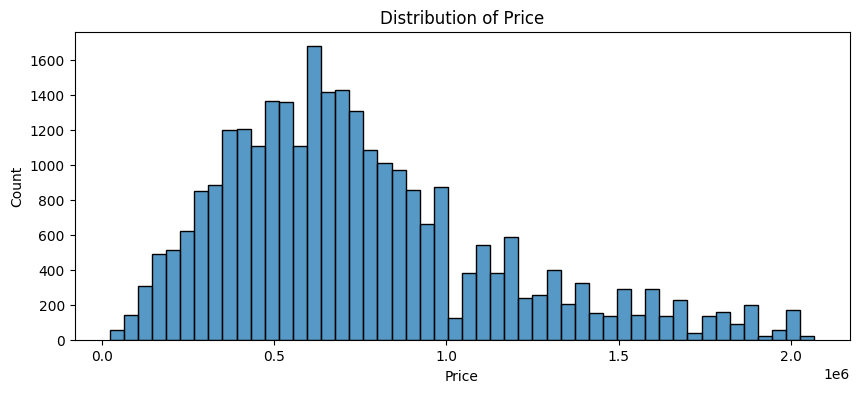

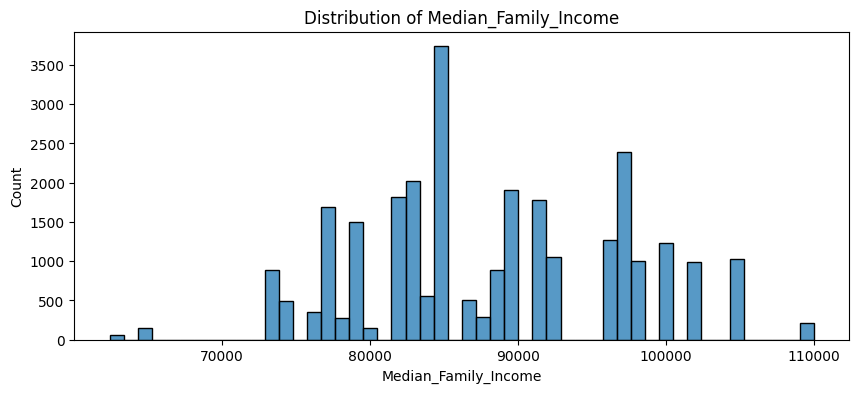

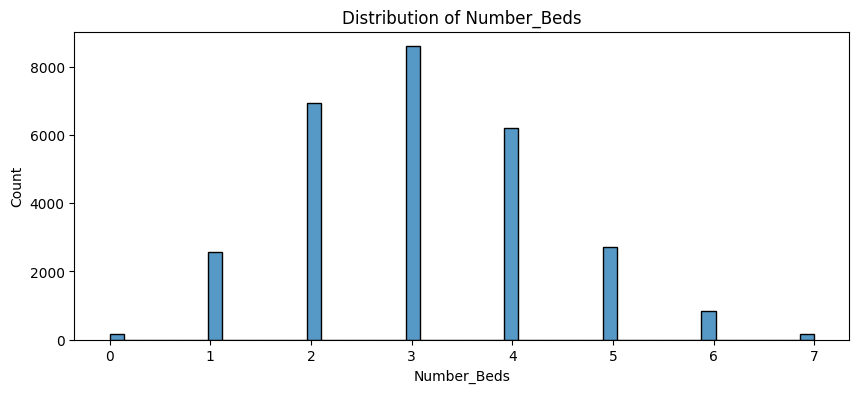

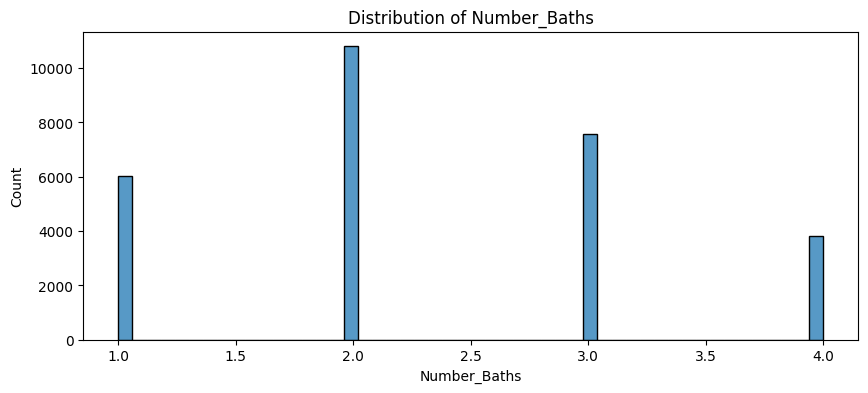

In [210]:
plot_distributions(df,['Price','Median_Family_Income','Number_Beds','Number_Baths'])

After outlier removal you can see histograms are more symetric and closer to normal distributions becuase ot this our models can work better.

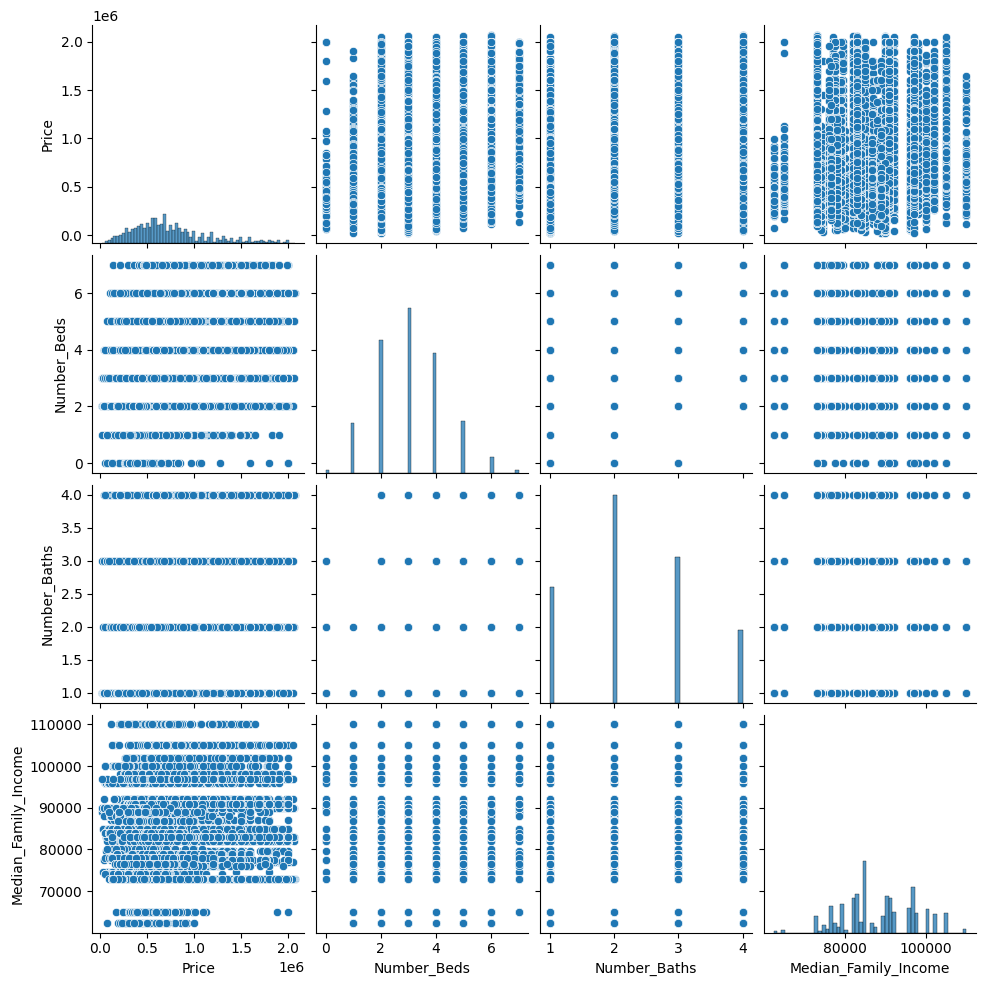

In [211]:
sns.pairplot(df)

plt.show()

We can also see scatter plots of this data understand more about relationships.We detected that Number_Baths and Number_Bedrooms are discrete variables.

In [212]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame

# Ordinal encoding for 'Number_Beds' and 'Number_Baths'
ordinal_columns = ['Number_Beds', 'Number_Baths']
label_encoder = LabelEncoder()
for column in ordinal_columns:
    df[column] = label_encoder.fit_transform(df[column])

# One-hot encoding for other columns
one_hot_columns = ['Province', 'City']

# Create a new DataFrame with the one-hot encoded columns
df_one_hot = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, df_one_hot], axis=1)

# Drop the original categorical columns that are now one-hot encoded
df = df.drop(columns=one_hot_columns)

# Standardize the entire DataFrame
mean = df.mean()
std_dev = df.std()
standardized_df = (df - mean) / std_dev

In [213]:
y = standardized_df['Price']
X = standardized_df.drop('Price',axis = 1)
split_index = int(0.8 * len(standardized_df))

X_train = X.iloc[:split_index, :]
X_test = X.iloc[split_index:, :]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

### Models


In [214]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#### Linear Regression

In [215]:
class LinearRegression:
    def __init__(self, alpha=0.01, num_iterations=1000):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.theta = None

    def hypothesis(self, X):
        return np.dot(X, self.theta)

    def cost_function(self, X, y):
        m = len(y)
        h = self.hypothesis(X)
        cost = (1/(2 * m)) * np.sum((h - y)**2)
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        cost_history = []

        for _ in range(self.num_iterations):
            h = self.hypothesis(X)
            errors = h - y
            gradient = (1/m) * np.dot(X.T, errors)
            self.theta -= self.alpha * gradient
            
            cost = self.cost_function(X, y)
            cost_history.append(cost)

        return cost_history

    def fit(self, X, y):
        # Adding a column of ones for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Initializing coefficients
        self.theta = np.zeros(X.shape[1])

        # Performing gradient descent
        cost_history = self.gradient_descent(X, y)

        return cost_history

    def predict(self, X):
        # Adding a column of ones for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]

        # Making predictions
        predictions = self.hypothesis(X)
        return predictions

In [216]:
lr_model = LinearRegression(alpha=0.05, num_iterations=800)

# Fitting the model
cost_history = lr_model.fit(X_train, y_train)


predictions = lr_model.predict(X_test)

mse_linear=mean_squared_error(y_test,predictions)
mae_linear=mean_absolute_error(y_test,predictions)
r2_linear =r2_score(y_test,predictions)


#### kNN Regression

In [166]:
class KNNRegression:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()

    def predict(self, X_test):
        X_test = X_test.to_numpy()
        predictions = []

        for x in X_test:
            # Calculate distances between x and all examples in the training set
            distances = np.sqrt(np.sum(np.square(self.X_train-x), axis=1))

            # Get indices of k-nearest training data points
            k_neighbors_indices = np.argsort(distances)[:self.k]

            # Get the corresponding target values of the k-nearest neighbors
            k_neighbor_values = self.y_train[k_neighbors_indices]

            # Calculate the mean of the target values as the prediction
            prediction = np.mean(k_neighbor_values)
            predictions.append(prediction)

        return np.array(predictions)


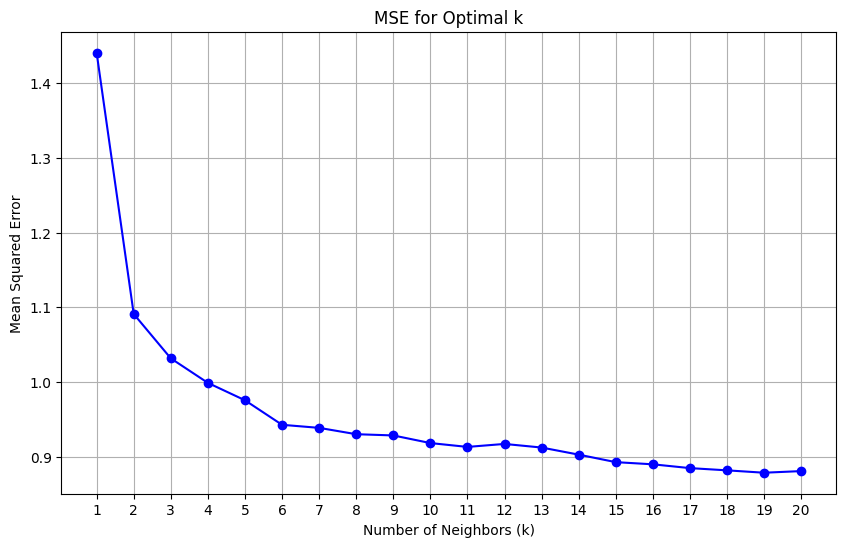

In [167]:
k_values = np.arange(1, 21, 1)
mse_values = []

# Calculate MSE for each k
for k in k_values:
    knn_regression = KNNRegression(k=k)
    knn_regression.fit(X_train, y_train)
    predictions = knn_regression.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

k=19 is lesser than k=20 and other k values so ı will use k=19

In [217]:
knn_regression = KNNRegression(k=19)

knn_regression.fit(X_train, y_train)

predictions = knn_regression.predict(X_test)
mse_knn = mean_squared_error(y_test, predictions)
mae_knn = mean_absolute_error(y_test,predictions)
r2_knn= r2_score(y_test, predictions)



#### Random Forest


In [221]:
class Node:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        """
        Node class represents a node in the decision tree.

        Parameters:
        - feature: Index of the feature for splitting at this node.
        - threshold: Threshold value for the feature splitting.
        - value: If the node is a leaf node, this represents the predicted value.
        - left: Left child node.
        - right: Right child node.
        """
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right


class DecisionTreeRegressor:
    """
        DecisionTreeRegressor represents a decision tree for regression.

        Parameters:
        - max_depth: Maximum depth of the tree. If None, the tree expands until
          nodes contain less than min_samples_split samples or no further split is possible.
        - min_samples_split: Minimum number of samples required to split an internal node.
        - n_features: Number of features to consider for each split. If None, use all features.
    """
    def __init__(self, max_depth=None, min_samples_split=2, n_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.tree = None

    def fit(self, X, y):
        """
        Fit the decision tree on the given training data.

        Parameters:
        - X: Feature matrix of shape (n_samples, n_features).
        - y: Target values of shape (n_samples,).
        """
        self.tree = self._grow_tree(X, y, curr_depth=0)


    def _grow_tree(self, X,y, curr_depth):
        """
        Recursively grow the decision tree.

        Parameters:
        - X: Feature matrix of shape (n_samples, n_features).
        - y: Target values of shape (n_samples,).
        - curr_depth: Current depth of the tree.

        Returns:
        - Node: The root node of the grown tree.
        """
        n_features = X.shape[1]
        unique_target = len(np.unique(y))

        # If only one class in the node or max depth reached or node has m, return a leaf node
        if (curr_depth==self.max_depth or unique_target==1):
            return Node(value=np.mean(y))


        selected_features = self._get_selected_features(n_features)# feature selection to find best split
        best_feature, best_threshold = self._best_split(X, y, selected_features)# best split determined by feature index and its treshold

        # these situation can happen when data is not splitted because of min_samples_split
        if best_feature is None:
            return Node(value=np.mean(y))

        mask = X[:, best_feature] <= best_threshold # boolean masking creation to filter and split data
        

        
        left = self._grow_tree(X[mask], y[mask], curr_depth+1) # left sub regression tree
        right = self._grow_tree(X[~mask], y[~mask], curr_depth+1) # right sub regression tree
        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right) # parent node of sub-trees


    def _best_split(self, X, y,n_features):
        """
        Find the best split for a node.

        Parameters:
        - X: Feature matrix of shape (n_samples, n_features).
        - y: Target values of shape (n_samples,).
        - n_features: Number of features to consider for the split.

        Returns:
        - Tuple: Index of the best feature and the threshold for the split.
        """
        best_mse = float('inf') # positive infinity is selected high mse value here
        # these two variable won't be none if we can find best acceptable split
        best_feature_idx=None 
        best_threshold = None

        # looping through features
        for feature_index in n_features:
            # this is trying to find unique element in the data to use as tresholds
            X_column = X[:, feature_index]
            thresholds = np.unique(X_column)
            
            # looping through tresholds 
            for threshold in thresholds:

                mask = X[:, feature_index] <= threshold #threshold masking

                if np.sum(mask) < self.min_samples_split or np.sum(~mask) < self.min_samples_split: # check for min_smaples_split
                    continue
                
                # if we have enough samples in each split we can calculate mse for that treshold 
                
                mse = self._calculate_mse(y[mask]) + self._calculate_mse(y[~mask])

                # if calcualted mse is lowering the average sum of residuals in each split we update best split feature_idx ,treshold and best mse
                if mse < best_mse:
                    best_mse = mse
                    best_feature_idx = feature_index
                    best_threshold = threshold

        return best_feature_idx, best_threshold
    
    
    def _calculate_mse(self, values):
        """
        Calculate the mean squared error.

        Parameters:
        - values: Target values.

        Returns:
        - float: Mean squared error.
        """
        if len(values) == 0:
            return 0
        mean_value = np.mean(values)
        mse = np.mean((values - mean_value) ** 2)
        return mse
    
    def _get_selected_features(self, num_features):
        """
        Get a random subset of features.

        Parameters:
        - num_features: Total number of features.

        Returns:
        - np.ndarray: Array of selected feature indices.
        """
        if self.n_features is None or self.n_features >= num_features:
            return np.arange(num_features)
        else:
            return np.random.choice(np.arange(num_features), size=self.n_features, replace=False)
    
    
    def predict(self, X):
        """
        Predict target values for input data.

        Parameters:
        - X: Feature matrix of shape (n_samples, n_features).

        Returns:
        - np.ndarray: Predicted target values for each sample in X.
        """
        return np.array([self._predict_tree(x, self.tree) for x in X])# calls predict_tree method root node for every entry in feature test set.

    def _predict_tree(self, x, node):
        """
        Recursively predict the target value for a given sample.

        Parameters:
        - x: Input feature vector.
        - node: Current node in the tree.

        Returns:
        - float: Predicted target value.
        """
        # if traversed node has value return it as a prediction
        if node.value is not None:
            return node.value

        # depend on feature and its treshold traverse the regression tree.
        if x[node.feature] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)


In [224]:
class RandomForestRegressor:
    def __init__(self, n_trees=100, **tree_params):
        # Initialize a list to store individual decision trees
        self.trees = [DecisionTreeRegressor(**tree_params) for _ in range(n_trees)]

    def fit(self, X, y):
        # Train each decision tree on a random subset of the data
        for tree in self.trees:
            # Randomly select indices with replacement
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])

    def predict(self, X):
        # Make predictions using each decision tree and average the results
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)


In [225]:
rf = RandomForestRegressor(n_trees=100, min_samples_split=5, max_depth=20, n_features=None)

# Train the random forest
rf.fit(X_train.values, y_train.values)

# Make predictions
predictions = rf.predict(X_test.values)

mse_rf = mean_squared_error(y_test,predictions)
mae_rf = mean_absolute_error(y_test,predictions)
r2_rf = r2_score(y_test,predictions)

#### SVR(Support Vector Regression)


In [231]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=100, epsilon=1)

# Train the model
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
# Evaluate the model
mse_svr = mean_squared_error(y_test,predictions)
mae_svr = mean_absolute_error(y_test,predictions)
r2_svr = r2_score(y_test,predictions)

#### Neural network regression

In [232]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=45)

# Train the model
mlp_regressor.fit(X_train, y_train.ravel())

# Make predictions on the test set
predictions = mlp_regressor.predict(X_test)


# Evaluate the model
mse_MLP = mean_squared_error(y_test, predictions)
mae_MLP = mean_absolute_error(y_test,predictions)
r2_MLP = r2_score(y_test,predictions)


#### Gradient Boost regression

In [233]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2,random_state=45)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_regressor.predict(X_test)

# Evaluate the model
mse_boost = mean_squared_error(y_test, predictions)
mae_boost = mean_absolute_error(y_test,predictions)
r2_boost = r2_score(y_test, predictions)


In [234]:
from tabulate import tabulate

#### Results

In [236]:
table_data = [
    ["Linear Regression",mae_linear, mse_linear, r2_linear],
    ["kNN Regression",mae_knn, mse_knn, r2_knn],
    ["Random Forest Regression",mae_rf, mse_rf, r2_rf],
    ["SVR", mae_svr,mse_svr, r2_svr],
    ["Neural Network Regression", mae_MLP,mse_MLP, r2_MLP],
    ["Gradient Boosting Regression",mae_boost, mse_boost, r2_boost],
]
headers = ["Model","Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-Squared"]

# Print the table
print(tabulate(table_data, headers, tablefmt="pretty"))

+------------------------------+---------------------------+--------------------------+---------------------+
|            Model             | Mean Absolute Error (MAE) | Mean Squared Error (MSE) |      R-Squared      |
+------------------------------+---------------------------+--------------------------+---------------------+
|      Linear Regression       |    0.7109733176701976     |    0.9311024042568233    | 0.29040353085411696 |
|        kNN Regression        |    0.6805069864945886     |     0.87871768490028     |  0.33032611264819   |
|   Random Forest Regression   |     0.608319826617952     |    0.686071474614996     | 0.3138812210410543  |
|             SVR              |    0.6031564211625228     |    0.5309218513103755    | 0.46904154184792646 |
|  Neural Network Regression   |    0.43346445575055886    |    0.383016642471968     | 0.6169569486892094  |
| Gradient Boosting Regression |    0.43574414847946785    |   0.38616460954737103    | 0.6138087645627806  |
+---------

#### Effect of Shuffling(Optional)

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
lr_model = LinearRegression(alpha=0.05, num_iterations=800)

# Fitting the model
cost_history = lr_model.fit(X_train, y_train)


predictions = lr_model.predict(X_test)

mse_linear=mean_squared_error(y_test,predictions)
mae_linear=mean_absolute_error(y_test,predictions)
r2_linear =r2_score(y_test,predictions)

In [240]:
knn_regression = KNNRegression(k=19)

knn_regression.fit(X_train, y_train)

predictions = knn_regression.predict(X_test)
mse_knn = mean_squared_error(y_test, predictions)
mae_knn = mean_absolute_error(y_test,predictions)
r2_knn= r2_score(y_test, predictions)

In [241]:
rf = RandomForestRegressor(n_trees=100, min_samples_split=5, max_depth=20, n_features=None)

# Train the random forest
rf.fit(X_train.values, y_train.values)

# Make predictions
predictions = rf.predict(X_test.values)

mse_rf = mean_squared_error(y_test,predictions)
mae_rf = mean_absolute_error(y_test,predictions)
r2_rf = r2_score(y_test,predictions)

In [242]:

svr = SVR(kernel='rbf', C=100, gamma=100, epsilon=1)

# Train the model
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
# Evaluate the model
mse_svr = mean_squared_error(y_test,predictions)
mae_svr = mean_absolute_error(y_test,predictions)
r2_svr = r2_score(y_test,predictions)

In [243]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=45)

# Train the model
mlp_regressor.fit(X_train, y_train.ravel())

# Make predictions on the test set
predictions = mlp_regressor.predict(X_test)


# Evaluate the model
mse_MLP = mean_squared_error(y_test, predictions)
mae_MLP = mean_absolute_error(y_test,predictions)
r2_MLP = r2_score(y_test,predictions)


In [244]:
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2,random_state=45)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_regressor.predict(X_test)

# Evaluate the model
mse_boost = mean_squared_error(y_test, predictions)
mae_boost = mean_absolute_error(y_test,predictions)
r2_boost = r2_score(y_test, predictions)


In [245]:
table_data = [
    ["Linear Regression",mae_linear, mse_linear, r2_linear],
    ["kNN Regression",mae_knn, mse_knn, r2_knn],
    ["Random Forest Regression",mae_rf, mse_rf, r2_rf],
    ["SVR", mae_svr,mse_svr, r2_svr],
    ["Neural Network Regression", mae_MLP,mse_MLP, r2_MLP],
    ["Gradient Boosting Regression",mae_boost, mse_boost, r2_boost],
]
headers = ["Model","Mean Absolute Errorw (MAE)", "Mean Squared Error (MSE)", "R-Squared"]

# Print the table
print(tabulate(table_data, headers, tablefmt="pretty"))

+------------------------------+----------------------------+--------------------------+---------------------+
|            Model             | Mean Absolute Errorw (MAE) | Mean Squared Error (MSE) |      R-Squared      |
+------------------------------+----------------------------+--------------------------+---------------------+
|      Linear Regression       |    0.47429521425629256     |   0.42840198765052473    | 0.5715684742099048  |
|        kNN Regression        |    0.44188744781774386     |   0.39435736708164126    | 0.6056154421412725  |
|   Random Forest Regression   |     0.6100873321475249     |    0.6885706442276677    | 0.31138187911167314 |
|             SVR              |     0.6031564211625228     |    0.5309218513103755    | 0.46904154184792646 |
|  Neural Network Regression   |    0.43346445575055886     |    0.383016642471968     | 0.6169569486892094  |
| Gradient Boosting Regression |    0.43574414847946785     |   0.38616460954737103    | 0.6138087645627806  |
+

These results may indicate that shuffleing has important in this data set but my random forest and regression tree can have some problems.if you can please check it and deliver a review for me.